In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import *

## Load Preprocessed Data

In [2]:
x, y, xtest, ytest, windows_per_machine, true = np.load('data/sequence data.npy', allow_pickle=True)

## LSTM Model

In [3]:
import tensorflow as tf
from keras import layers
from keras import callbacks
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [4]:
model = Sequential([
    layers.LSTM(units=128, input_shape=(30, 17), dropout=0.2, return_sequences=True, activation='tanh'),
    layers.LSTM(units=64, dropout=0.2, return_sequences=True, activation='tanh'),
    layers.LSTM(units=32, activation='tanh'),
    layers.Dense(units=96, activation='relu'),
    layers.Dropout(rate=0.2),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=1)
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

2023-12-12 12:14:10.557263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-12 12:14:10.558177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-12 12:14:10.558988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

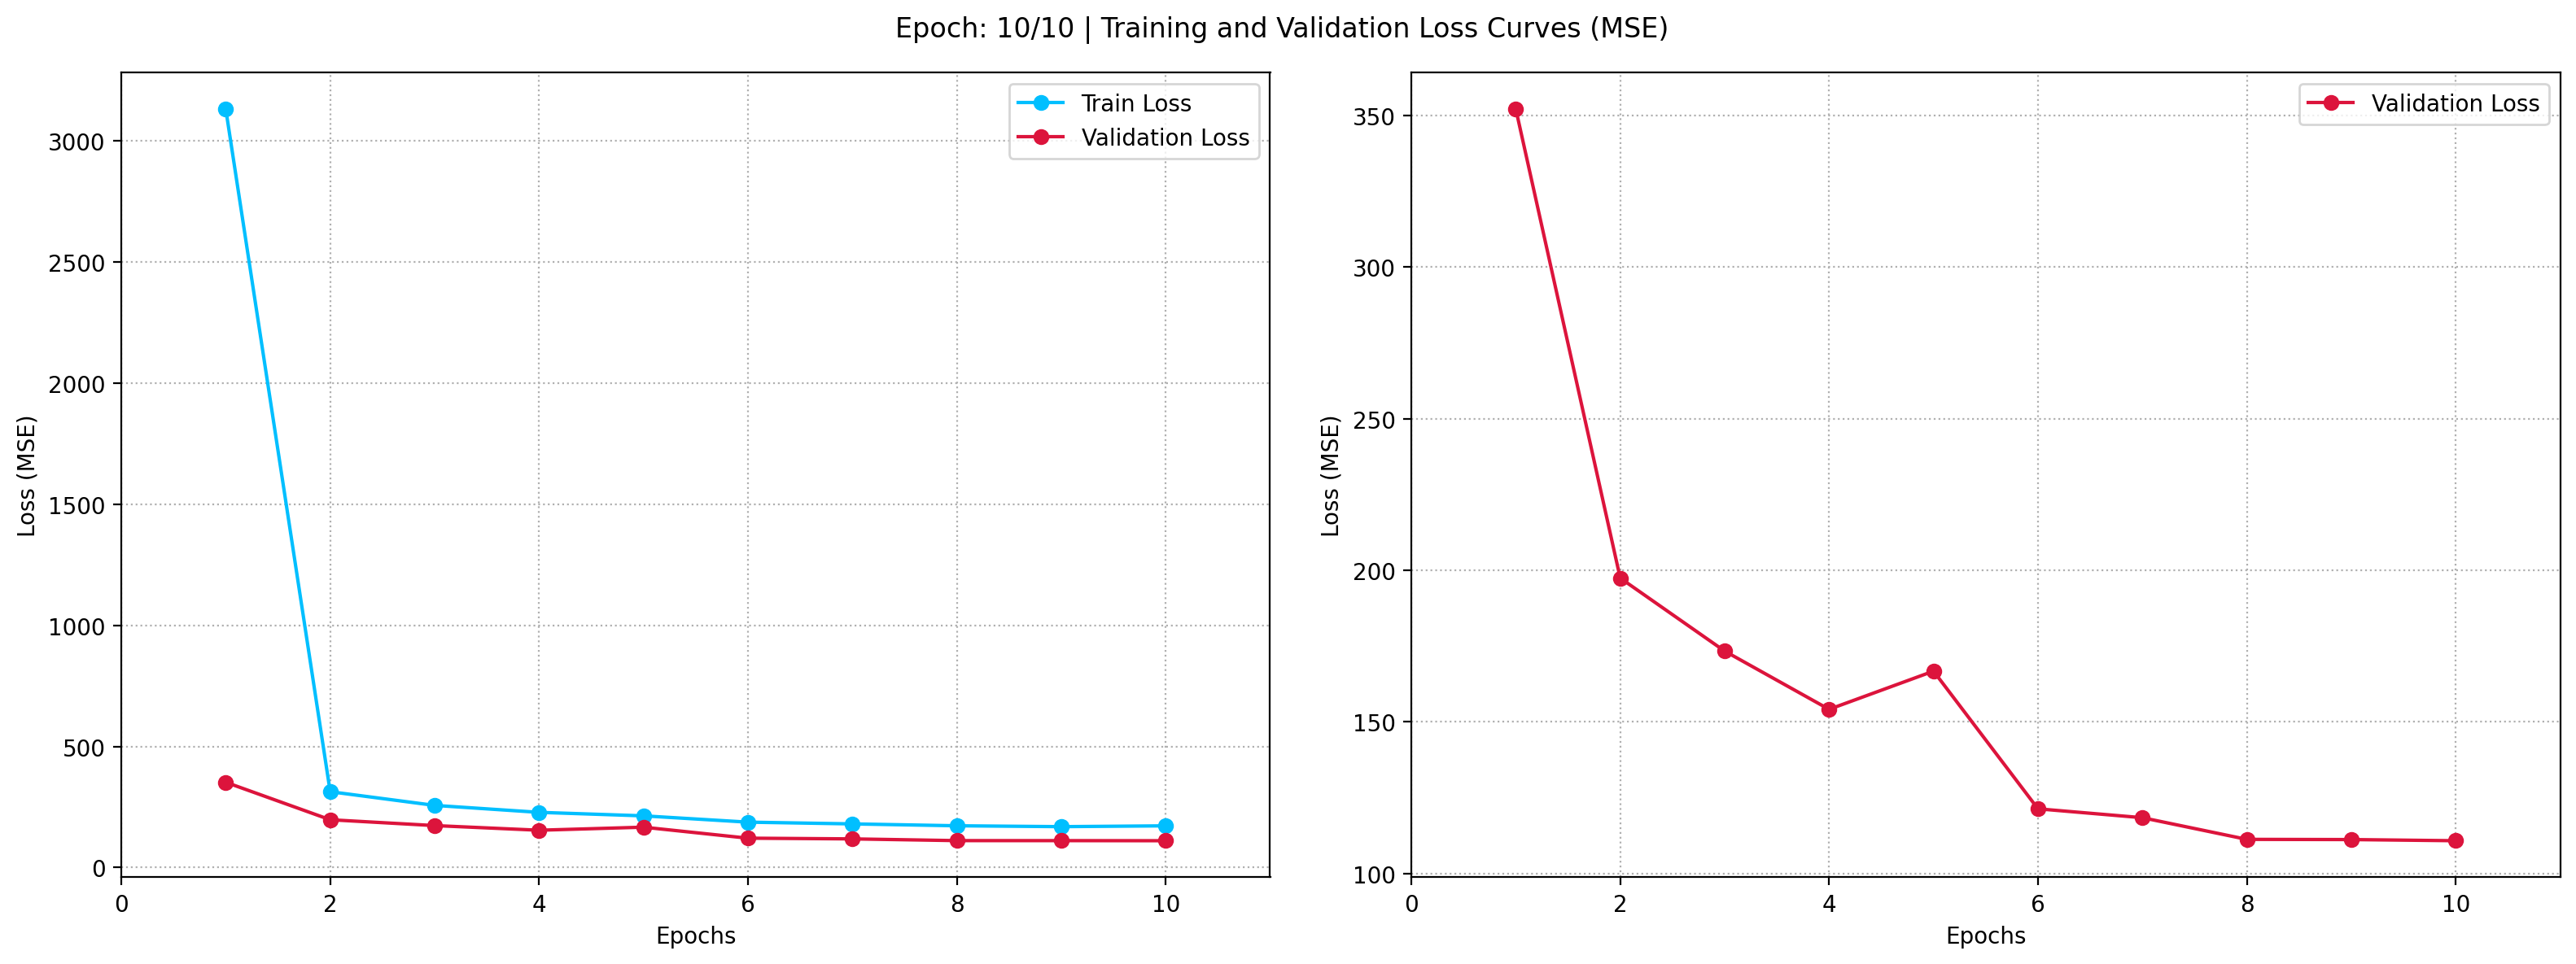

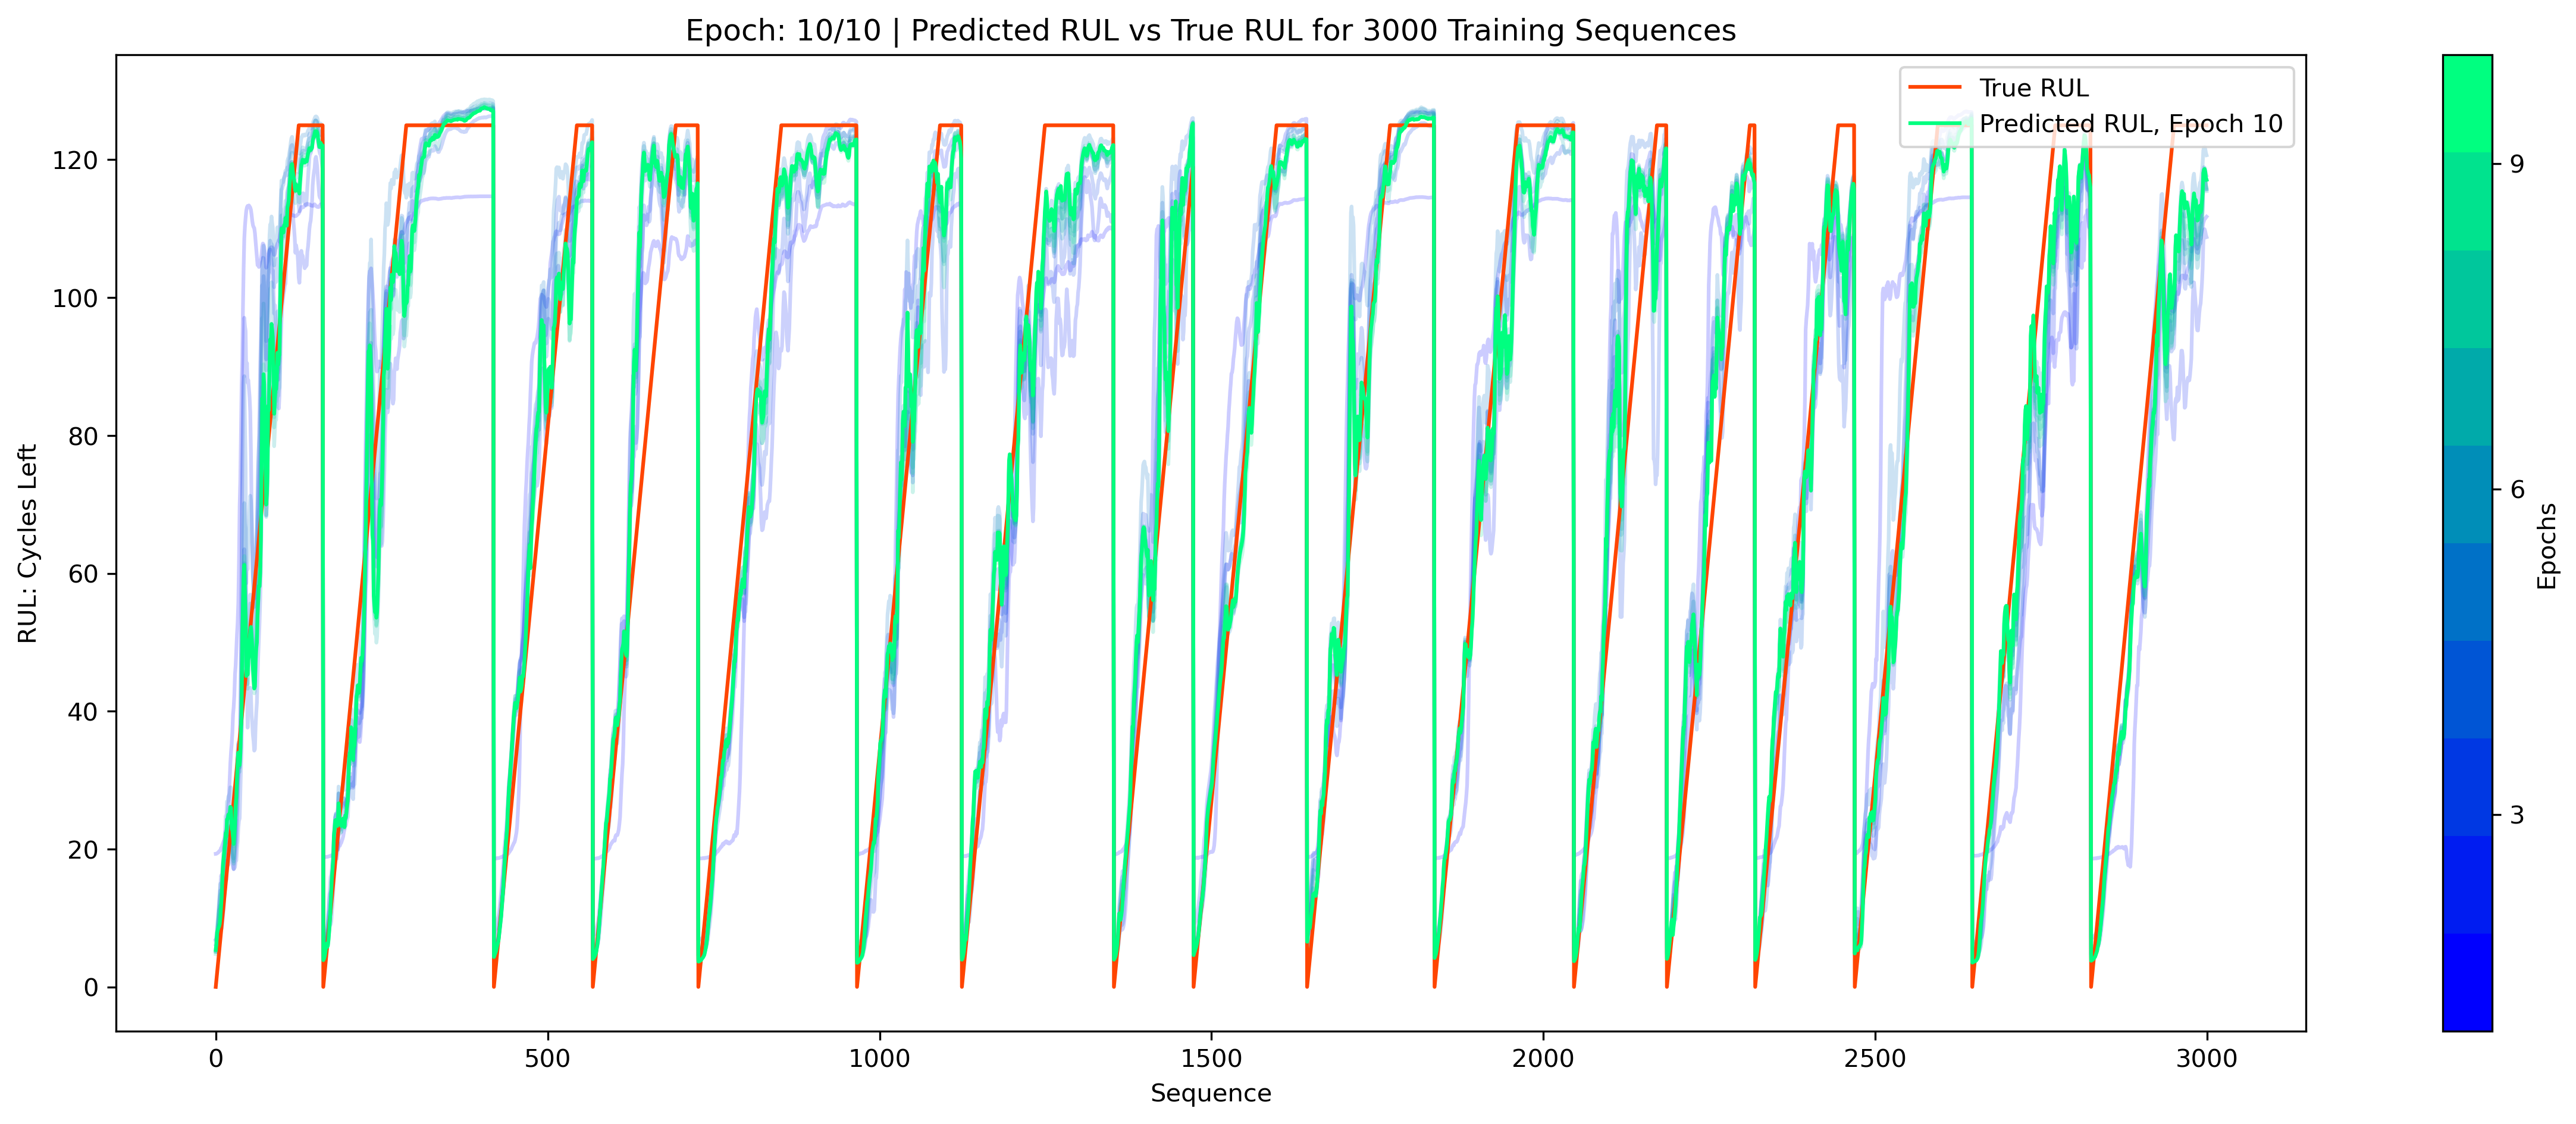


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/10


2023-12-12 12:14:11.797410: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-12 12:14:11.943017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-12 12:14:11.943654: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-12 12:14:11.944300: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

94/94 [==============================] - 2s 11ms/step
111/111 - 16s - loss: 3131.9126 - val_loss: 352.1592 - lr: 0.0010 - 16s/epoch - 141ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/10
94/94 [==============================] - 1s 12ms/step
111/111 - 12s - loss: 313.2623 - val_loss: 197.4504 - lr: 0.0010 - 12s/epoch - 110ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/10
94/94 [==============================] - 1s 11ms/step
111/111 - 12s - loss: 256.7377 - val_loss: 173.3674 - lr: 0.0010 - 12s/epoch - 111ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/10
94/94 [==============================] - 1s 10ms/step
111/111 - 13s - loss: 228.0305 - val_loss: 154.1602 - lr: 0.0010 - 13s/epoch - 113ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/10
94/94 [==============================] - 1s 14ms/step
111/1

In [5]:
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.2, shuffle=True)

lr_schedule = callbacks.LearningRateScheduler(lambda epoch, lr: lr/10 if epoch == 5 else lr, verbose=1)
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

loss_curve = LossCurve(*plt.subplots(ncols=2, nrows=1, figsize=(16, 6), dpi=200))
rul_graph = RULGraph(fig=plt.figure(figsize=(16, 6), dpi=300), ax=plt.axes(), x=x, y=y, time_points=3000)

history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xval, yval), callbacks=[lr_schedule, early_stop, loss_curve, rul_graph], batch_size=128, verbose=2)

In [6]:
# performance only using average of test predictions per engine
mean_predictions = metrics(model=model, xtest=xtest, true=true, y_per_engine=windows_per_machine, mean_metrics=True)

16/16 [==============================] - 0s 14ms/step
MSE:  198.1926167481136
RMSE:  14.078089953829448
MAE:  10.898488402366638
R2:  0.885230120011312


In [7]:
# performance only using the last test record per engine
last_predictions = metrics(model=model, xtest=xtest, true=true, y_per_engine=windows_per_machine, mean_metrics=False)

16/16 [==============================] - 0s 13ms/step
MSE (Taking only last sample):  197.67416057931894
RMSE (Taking only last sample):  14.059664312469161
MAE (Taking only last sample):  10.492550015449524
R2 (Taking only last sample):  0.8855303489161435


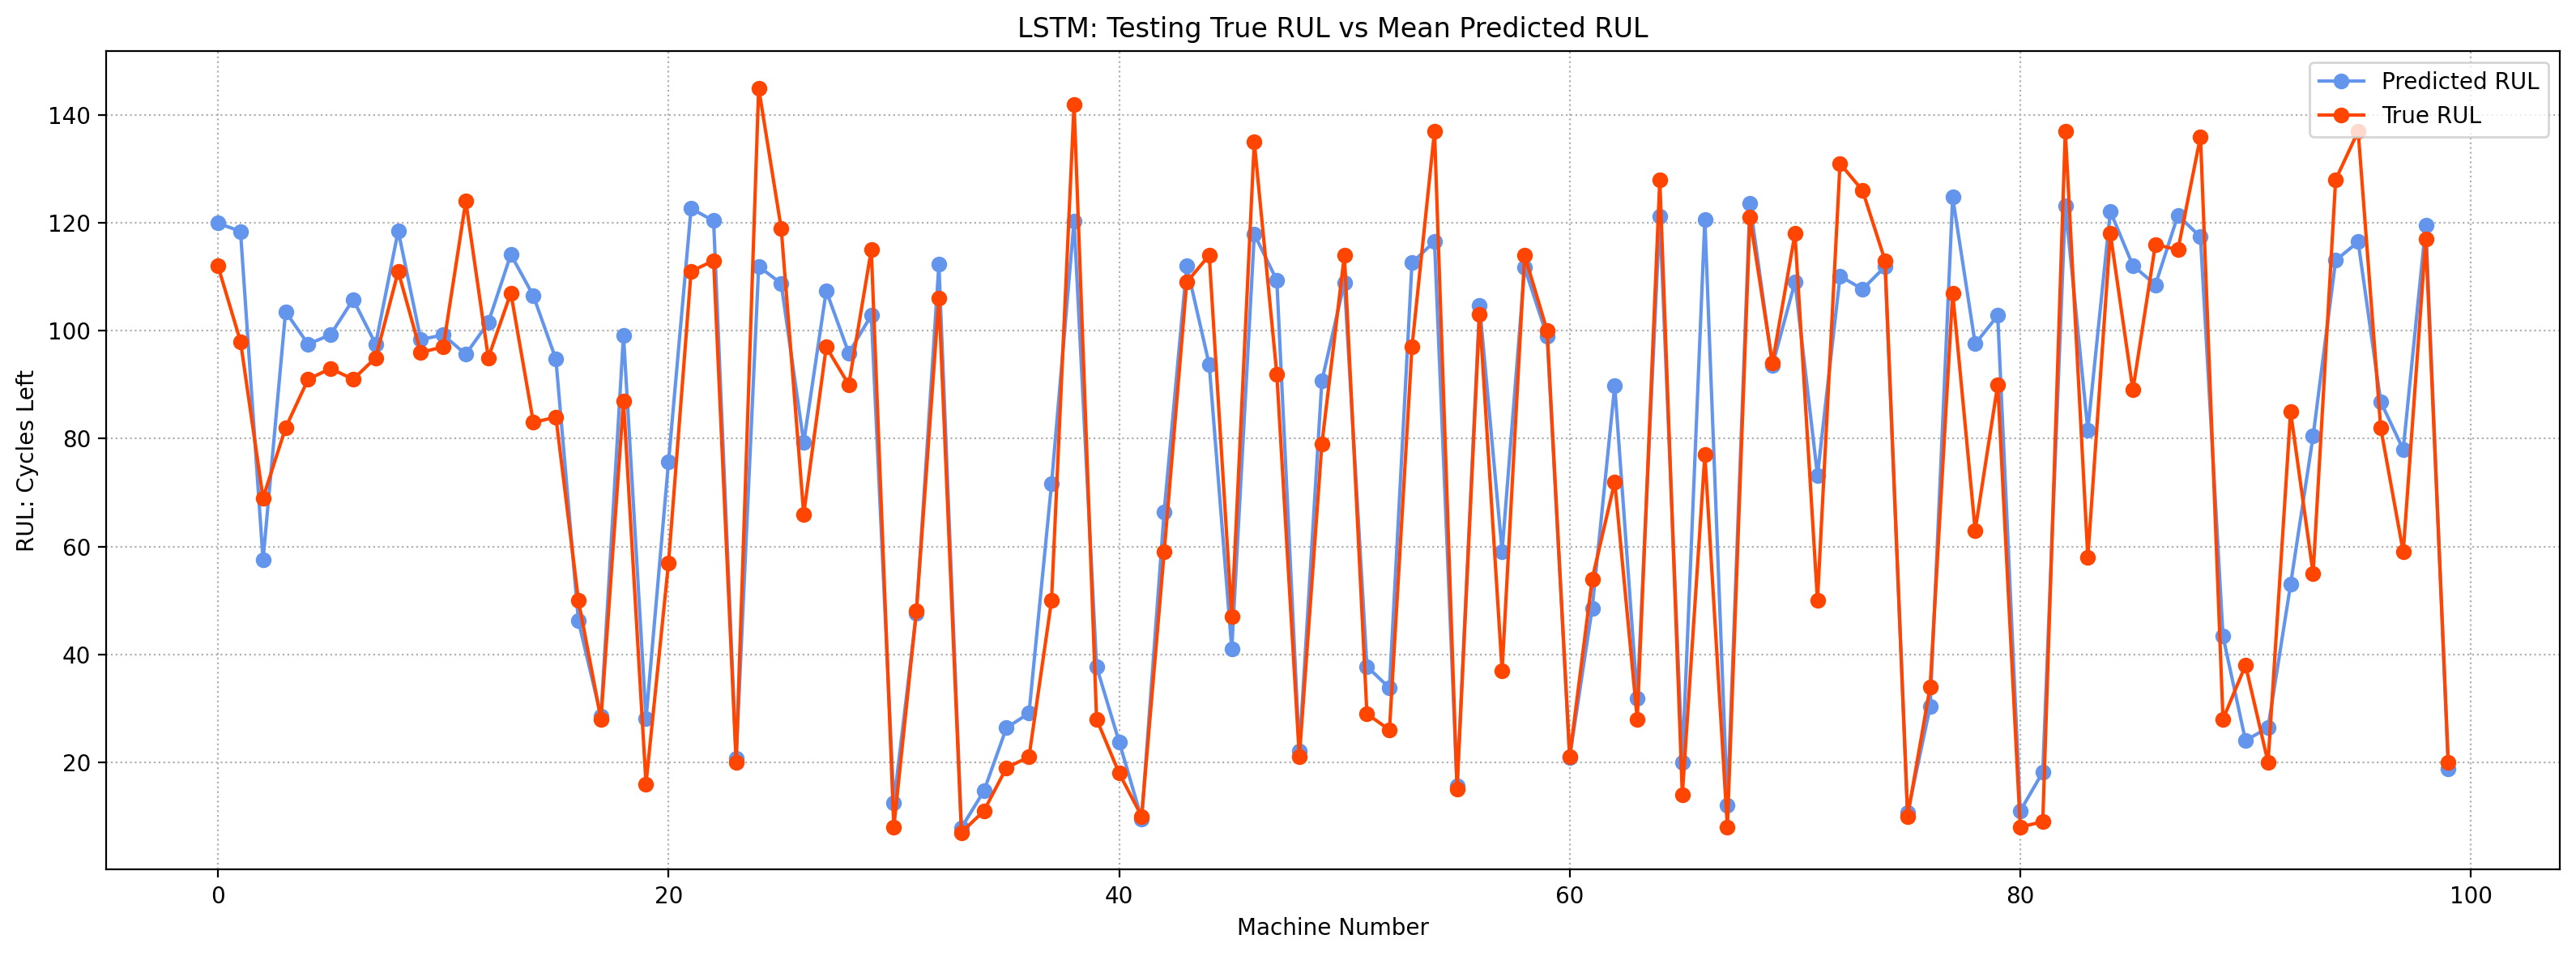

In [9]:
fig, ax = test_plot(model_name='LSTM', predictions=mean_predictions, true=true, mean_predictions=True)